<a href="https://colab.research.google.com/github/aletelecom/FreeCover-Project/blob/master/Colab_Fine_Tuning_FreeCover(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proceso de Fine-tuning

En este Colab Notebook vamos a realizar el procedimiento de sintion√≠a fina del modelo utilizado para nuestro anal√≠sis de sentimiento. La raz√≥n para elegir Colab es la posibilidad de tener acceso a un GPU, lo que acelera el proceso en gran medida.

Lo primero que haremos ser√° clonar el repositorio, donde tenemos todos los datos necesarios para el proceso:

In [ ]:
!git clone https://github.com/aletelecom/FreeCover-Project.git

Cloning into 'FreeCover-Project'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 56 (delta 18), reused 31 (delta 4), pack-reused 0
Unpacking objects: 100% (56/56), 27.10 MiB | 12.99 MiB/s, done.


Adicionalmente debemos instalar las librer√≠as necesarias para poder hacer uso del GPU disponible, y el proceso de "fine-tuning":

In [ ]:
!pip install torch torchvision torchaudio
!pip install transformers[sentencepiece]
!pip install transformers datasets
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.1/7.1 MB 48.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 224.5/224.5 kB 26.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 71.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 69.0 MB/s eta 0:00:00
  Attempt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 474.6/474.6 kB 10.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 212.5/212.5 kB 26.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.3/134.3 kB 11.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

## Proceso de etiquetado manual

Un paso previo para poder realizar el procedimiento de sinton√≠a fina del modelo es la creaci√≥n de una columna con etiquetas manuales, recordemos que el modelo "vainilla" no reconoce los modismos, y frases "marabinas", y su interpretaci√≥n (clasificaci√≥n) de estas es err√≥nea la mayor√≠a de las veces.

Para hacer este paso previo realizamos los siguientes pasos:

1. Como primer paso simplemente abrimos el set de datos en un programa como MS Excel, o Google Sheets.
2. Creamos una nueva columna, en este caso la llam√© __manual_label__.
3. Y elegimos al azar comentarios, y colocamos su clasificaci√≥n, en este caso con la etiqueta de tres letras: "POS", "NEG", y "NEU", para positivo, negativo, y neutro respectivamente.

En nuestro caso etiquetamos cerca de 800 comentarios.

Seguidamente cargamos el archivo:

In [ ]:
import pandas as pd

data_file = '/content/FreeCover-Project/Comentarios/Comentarios-FreeCover-Sentimiento(v3_manual_label).xlsx'
comments_df = pd.read_excel(data_file, index_col=0)
comments_df = comments_df.dropna(subset=['comment_text'])

In [ ]:
comments_df.head(3)

video_id                                        video_title  \
0  bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
1  bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
2  bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   

           video_date                                       comment_text  \
0 2017-10-22 20:49:49                            inviten a guzman musica   
1 2017-10-22 20:49:49  debo reconocer que este free cover y el de jua...   
2 2017-10-22 20:49:49                                      jabon sincero   

         comment_date sentimiento manual_label Diferent  
0 2017-10-22 20:49:49         NEU          NEU       SI  
1 2017-10-22 20:49:49         POS          NaN       NO  
2 2017-10-22 20:49:49         NaN          NEU       NO

In [ ]:
comments_df['manual_label'].value_counts()

POS    477
NEU    310
NEG     84
Name: manual_label, dtype: int64

Vemos que existe un desbalance en la cantidad de muestras de cada clase, siendo la clase "negativa" la que menos ejemplos tiene.

Sin embargo, el modelo final result√≥ tener un "accuracy" de 80 %, lo que representa un aumento de 10 % con respecto al modelo "vainilla". Este aumento result√≥ ser suficiente para efectos de nuestro trabajo en esta demostraci√≥n, por lo que si se est√° buscando mayores valores de "accuracy" se deben modificar los parametros necesarios dentro de este Colab.

Ahora realicemos algunas limpiezas a los datos de texto:

In [ ]:
import re
import unicodedata

def clean_text(text):
    # Convierte el texto a min√∫sculas
    text = text.lower()

    # Elimina las puntiaciones
    text = re.sub(r'[^\w\s]', '', text)

    # Remueve los acentos
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    return text

In [ ]:
comments_df['comment_text'] = comments_df['comment_text'].apply(clean_text)

In [ ]:
comentarios = comments_df['comment_text'].tolist()
# comentarios = ['Salado', 'Dulce']

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("edumunozsala/roberta_bne_sentiment_analysis_es")
model = AutoModelForSequenceClassification.from_pretrained("edumunozsala/roberta_bne_sentiment_analysis_es")

def modelizer(x):
    input_ids = torch.tensor(tokenizer.encode(x)).unsqueeze(0)
    outputs = model(input_ids)
    output = outputs.logits.argmax(1)
    return int(output)


In [ ]:
comments_df['comment_text'].loc[:50]

0                               inviten a guzman musica
1     debo reconocer que este free cover y el de jua...
2                                         jabon sincero
3                           enamorada  de los freecover
4     un free cover de guacode adolescentes los prim...
5     me imagino esta cancion mia en freecover\nhttp...
6     exitos mis panas somos 2 venezolanos radicados...
8              dfntvmnt hermoso naturalmente impecable 
9                                            me encanta
10    que bonitoque bonito lo escucho siempre me gus...
11                      canta bello astolfo felicidades
12                                brutal invten a caibo
13    este es uno de mis favoritos junto con el de j...
14    excelente si hace 3 anos alguien hubiera podid...
15    todos los cover son excelentes tenian que ser ...
16    sin duda algunasoy muy venezolano y con orgull...
17                                     son los mejores 
18                                            qu

Importamos algunas librer√≠as necesarias:

In [ ]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, TextClassificationPipeline
from datasets import Dataset, Features, ClassLabel, Value, load_metric

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print("Device:", device)

Device: cuda


Para ejecutar el proceso de "fine-tuning" en s√≠, crearemos una funci√≥n, la cual se servir√° principalmente por herramientas de la librer√≠a para este proposito de __Huggingface__, especificamente del modelo utilizado [pysentimiento/robertuito-sentiment-analysis](https://huggingface.co/pysentimiento/robertuito-sentiment-analysis).

La funci√≥n "fine_tune_model" es una implementaci√≥n en Python que realiza el ajuste fino de un modelo de procesamiento de lenguaje natural (NLP). Esta funci√≥n utiliza la biblioteca "transformers" para cargar un tokenizer y un modelo preentrenado. Luego, se define una funci√≥n de tokenizaci√≥n y se crean conjuntos de datos de entrenamiento y prueba.

Utilizando un objeto "Trainer", se entrena el modelo con los datos de entrenamiento y se eval√∫a con los datos de prueba. La m√©trica de evaluaci√≥n utilizada es la exactitud.

Adem√°s, se define una funci√≥n llamada "sentiment_classify" que toma una lista de textos y devuelve las predicciones de sentimiento utilizando el modelo fine-tuned. Estas predicciones se agregan al dataframe original:

In [ ]:
def fine_tune_model(df, train, test, text_column, label_column):

    max_length_model = 128

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("pysentimiento/robertuito-base-uncased",
                                              truncation=True,
                                              pad_to_max_length=True,
                                              max_length=max_length_model,
                                              return_tensors='pt'
                                              )
    model = AutoModelForSequenceClassification.from_pretrained(
        "pysentimiento/robertuito-base-uncased",
        num_labels=3,
        ).to(device)

    def tokenize_function(examples):
        max_length_model = 128
        return tokenizer(examples[text_column],
                        truncation=True,
                        pad_to_max_length=True,
                        max_length=max_length_model,
                        return_tensors='pt',
                         ).to(device)

    train_dataset = train.map(tokenize_function, batched=True)
    test_dataset = test.map(tokenize_function, batched=True)

    (print(train_dataset[0]))
    (print(test_dataset[0]))

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy='epoch',
        num_train_epochs=10,
        weight_decay=0.01,
        # push_to_hub=False,
        logging_dir='./logs',
        logging_steps=500,
        metric_for_best_model='accuracy',
    )

    metric = load_metric("accuracy")
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Define trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    # Fine-tune model
    trainer.train()

    # Evaluate model
    eval_result = trainer.evaluate(eval_dataset=test_dataset)

    print(f"Accuracy: {eval_result['eval_accuracy']:.2f}")

    def sentiment_classify(text_list, batch_size=32):
        predictions = []

        for i in range(0, len(text_list), batch_size):
            batch = text_list[i:i+batch_size]
            tokenized = tokenizer.batch_encode_plus(
                batch,
                max_length=max_length_model,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            ).to(device)

            with torch.no_grad():
                logits = model(tokenized['input_ids'], tokenized['attention_mask']).logits
                batch_predictions = torch.argmax(logits, dim=1).tolist()

            predictions.extend(batch_predictions)

        return predictions

    df['fine-tuned_label'] = sentiment_classify(df['comment_text'].tolist(), batch_size=32)


    labels_dict = {0:'POS', 1:'NEG', 2:'NEU'}
    df['fine-tuned_label'] = df['fine-tuned_label'].apply(lambda x: labels_dict[x])

    return df

In [ ]:
import re
import unicodedata

def clean_text(text):
    # Convierte el texto a min√∫sculas
    text = str(text).lower()

    # Elimina las puntiaciones
    text = re.sub(r'[^\w\s]', '', text)

    # Remueve los acentos
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    return text

In [ ]:
comments_df['comment_text'] = comments_df['comment_text'].apply(clean_text)

Veamos un gr√°fico de barras de la columna "manual_label", que contiene las etiquetas de los cerca de 800 comentarios clasificados manualmente:

<Axes: >

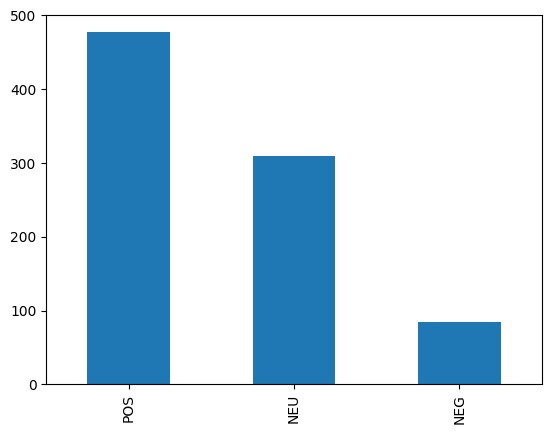

In [ ]:
comments_df['manual_label'].value_counts().plot.bar()

## Creaci√≥n de los objetos "Dataset" de Huggingface

Como parte del proceso de sinton√≠a fina, __Huggingface__ sugiere la creaci√≥n de objetos llamados "Dataset", que facilitan la ejecuci√≥n de dicho proceso.

Basicamente un objeto "Dataset" de Hugging Face es una estructura de datos optimizada para el procesamiento de lenguaje natural. Proporciona eficiencia en el manejo de grandes conjuntos de datos, compatibilidad con transformaciones y pipelining, integraci√≥n con modelos y herramientas de entrenamiento, y compatibilidad con est√°ndares de la industria.


In [ ]:
def create_hf_dataset(df, text_column, label_column):
  """
  Crea dos objetos Dataset de HF a partir de un df con los datos.
  """
  df = df.dropna(subset=[label_column])

  class_names = ['POS', 'NEG', 'NEU']
  sentiment_features = Features({text_column:Value('string'), label_column:ClassLabel(names=class_names)})

  train_df, test_df = train_test_split(df, test_size=0.2, stratify=df[label_column])

  train_ds = Dataset.from_pandas(train_df, split='train', features=sentiment_features, preserve_index=False)
  test_ds = Dataset.from_pandas(test_df, split='test', features=sentiment_features, preserve_index=False)

  return train_ds, test_ds

In [ ]:
fine_tune_df = comments_df.loc[:,['comment_text', 'manual_label']]
fine_tune_df.rename(columns={'comment_text':'text', 'manual_label':'label'}, inplace=True)

In [ ]:
fine_tune_df.shape

(69013, 2)

In [ ]:
fine_tune_df.head()

Ahora creamos instancias de los datasets de entrenamiento, y de pruebas basados en el dataset original.

In [ ]:
train_ds, test_ds = create_hf_dataset(fine_tune_df, 'text', 'label')

In [ ]:
comments_df['comment_text'] = comments_df['comment_text'].apply(clean_text)

Ahora ejecutamos el proceso de sinton√≠a fina en s√≠:

In [ ]:
fine_tuned_comments_df = fine_tune_model(comments_df, train_ds, test_ds, 'text', 'label')

Some weights of the model checkpoint at pysentimiento/robertuito-base-uncased were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.

Map:   0%|          | 0/696 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Map:   0%|          | 0/175 [00:00<?, ? examples/s]

{'text': 'cono respondieron mi peticion jajaja gloria a dios', 'label': 2, 'input_ids': [0, 1157, 1479, 3363, 507, 656, 962, 526, 4046, 7381, 412, 1087, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-19-b80069b1d6cc>:44: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 0.80


El "accuracy" del modelo es de 80 %, y como comentamos anteriormente esto significa un aumento de 10 puntos porcentuales frente al modelo "vainilla", lo que para efectos de nuestro proyecto es muy bueno.

Veamos algunos comentarios negativos:

In [ ]:
fine_tuned_comments_df[fine_tuned_comments_df['fine-tuned_label']=='NEG']

video_id                                        video_title  \
89     bXKXFs5z9as          [Free Cover Venezuela]  Amor Fiel - Cochi   
179    r2y0PrMDXMM  [Free Cover Venezuela] Juan Miguel - Como tu, ...   
195    r2y0PrMDXMM  [Free Cover Venezuela] Juan Miguel - Como tu, ...   
234    r2y0PrMDXMM  [Free Cover Venezuela] Juan Miguel - Como tu, ...   
405    IZJ49j1LIhk  [Free Cover Venezuela] Carlos Parra - Maquina ...   
...            ...                                                ...   
70283  J1DUAY8BgaQ  Karaoke [Free Cover Venezuela] Ronald Borjas  ...   
70318  oRgnzievS94              In side Free Cover  Raquel & Portillo   
70327  oRgnzievS94              In side Free Cover  Raquel & Portillo   
70357  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   
70409  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   

               video_date                                       comment_text  \
89    2017-10-14 19:21:19  el que hizo las tomas lo que hace es marear al...   
179   2017-12-11 23:48:20  comparado a todos los demas artistas que han e...   
195   2017-12-11 23:48:20                  esa sayonara si es feano me gusta   
234   2017-12-11 23:48:20  no em gustaba juan miguel hasta escucharlo aqu...   
405   2017-11-12 19:12:35  no chico que mala suerte nada   exitoso es lo ...   
...                   ...                                                ...   
70283 2020-09-17 22:59:18  buenazaaa a mi q no me gusta el karaokee diosm...   
70318 2023-02-14 15:03:40             sorry pero osman aray es un mega plomo   
70327 2023-02-14 15:03:40  quien es esa  raquelme parec una roba show  y ...   
70357 2022-10-27 02:27:27  todo bien menos esa introduccion con osman ara...   
70409 2022-10-27 02:27:27  no me gusta el in side porque esperar el estre...   

             comment_date sentimiento manual_label Diferent fine-tuned_label  
89    2017-10-14 19:21:19         NEG          NEG       SI              NEG  
179   2017-12-11 23:48:20         NEG          NEG       SI              NEG  
195   2017-12-11 23:48:20         NaN          NEG       NO              NEG  
234   2017-12-11 23:48:20         POS          NaN       NO              NEG  
405   2017-11-12 19:12:35         POS          NaN       NO              NEG  
...                   ...         ...          ...      ...              ...  
70283 2020-09-17 22:59:18         NaN          NaN       SI              NEG  
70318 2023-02-14 15:03:40         NEG          NEG       SI              NEG  
70327 2023-02-14 15:03:40         POS          NEG       NO              NEG  
70357 2022-10-27 02:27:27         NEG          NEG       SI              NEG  
70409 2022-10-27 02:27:27         NEG          NEG       SI              NEG  

[1248 rows x 9 columns]

Se pueden observar algunos comentarios clasificados como negativos, que anteriormente hab√≠an sido clasificados como positivos, y que en efecto son negativos, y tambi√©n podemos observar comentarios clasificados como negativos que no lo son, y de all√≠ que hay todav√≠a un 20 % de los comentarios que podr√≠an ser clasificados err√≥neamente. Este √∫ltimo caso, es pr√°cticamente imposible de reducir a 0 %, y definitivamente no es el esp√≠ritu de nuestro proyecto, por lo que nos vamos a quedar con este modelo.

Ahora filtramos las columnas, y las ordenamos como queremos que queden en el producto final:

In [ ]:
fine_tuned_comments_df = fine_tuned_comments_df.loc[:,[
    'video_id',
    'video_title',
    'video_date',
    'comment_text',
    'comment_date',
    'sentimiento',
    'manual_label',
    'fine-tuned_label']]

In [ ]:
fine_tuned_comments_df

video_id                                        video_title  \
0      bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
1      bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
2      bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
3      bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
4      bI-w7HaeJPU  [Free Cover Venezuela] Amor Sincero / La estoy...   
...            ...                                                ...   
70448  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   
70449  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   
70450  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   
70451  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   
70452  mxxeNLCcVQ4  [IN-SIDE] Free Cover - Sandy y Papo (@MagicJua...   

               video_date                                       comment_text  \
0     2017-10-22 20:49:49                            inviten a guzman musica   
1     2017-10-22 20:49:49  debo reconocer que este free cover y el de jua...   
2     2017-10-22 20:49:49                                      jabon sincero   
3     2017-10-22 20:49:49                        enamorada  de los freecover   
4     2017-10-22 20:49:49  un free cover de guacode adolescentes los prim...   
...                   ...                                                ...   
70448 2022-10-27 02:27:27                                   va a estar bueno   
70449 2022-10-27 02:27:27                                   activo esperando   
70450 2022-10-27 02:27:27                                               hola   
70451 2022-10-27 02:27:27                            aqui estamos desde mcbo   
70452 2022-10-27 02:27:27          primer comentario saludos son los mejores   

             comment_date sentimiento manual_label fine-tuned_label  
0     2017-10-22 20:49:49         NEU          NEU              NEU  
1     2017-10-22 20:49:49         POS          NaN              POS  
2     2017-10-22 20:49:49         NaN          NEU              NEU  
3     2017-10-22 20:49:49         POS          NaN              NEU  
4     2017-10-22 20:49:49         POS          NaN              POS  
...                   ...         ...          ...              ...  
70448 2022-10-27 02:27:27         POS          POS              POS  
70449 2022-10-27 02:27:27         NEU          NEU              NEU  
70450 2022-10-27 02:27:27         NEU          NEU              NEU  
70451 2022-10-27 02:27:27         NEU          NEU              NEU  
70452 2022-10-27 02:27:27         POS          POS              POS  

[69013 rows x 8 columns]

Como paso final, guardamos el resultado en nuestro drive, de manera de poder recuperarlo y poder utilizarlo a nuestro antojo, en nuestro caso, lo rescataremos y lo colocaremos en el repositorio, de manera de que quien lo desee utilizar lo pueda hacer, sin tener que ejecutar este Colab.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Ask the user to enter the filename
filename = "Comentarios_clasificados_fine-tuned-FreeCover(v2).csv"

# Join the user-entered filename with the drive directory path
path = os.path.join('/content/drive/My Drive', filename)

# Write to the specified file
with open(path, 'w', encoding='latin1') as f:
    fine_tuned_comments_df.to_csv(f, sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
